# Part I - Ford GoBike System Data Analysis
## by Aaliyah Motala

<a id='intro'></a>
## Introduction
>
> The dataset that I will be analyzing is the San Franciso, USA - Ford GoBike System data for February 2019. <br>
> The Ford GoBike was first established in the San Francisco Bay Area as Bay Area Bike Share in 2013 and later relaunched as the Ford GoBike in 2017. The system was known as Bay Wheels since June 2019. <br>
> The Bay Wheels has 3 pricing options which you need to know as its part of the dataset. A person can be a subscriber, who pays monthly or yearly or subscribe to Bike Share for All which is an annual fee and a non-subscriber who pays for each trip.<br>
><br>
>
 

## Table of Contents

<ul>

 <li><a href="#intro">Introduction</a></li>
 <li><a href="#dict">Data Dictionary</a></li>
 <li><a href="#wrangle">Preliminary Wrangling</a></li>
 <li><a href="#assess">Assessing Data</a></li>
 <li><a href="#clean">Data Cleaning</a></li>
 <li><a href="#uni">Univariate</a></li>
 <li><a href="#bi">Bivariate</a></li>
 <li><a href="#multi">Multivariate</a></li>
 <li><a href="#conc">Conclusions</a></li>

</ul>

<a id='dict'></a>
### Data Dictionary 
>
>Duration (seconds)<br>
>Start Time and Date<br>
>End Time and Date<br>
>Start Station ID<br>
>Start Station Name<br>
>Start Station Latitude<br>
>Start Station Longitude<br>
>End Station ID<br>
>End Station Name<br>
>End Station Latitude<br>
>End Station Longitude<br>
>Bike ID<br>
>User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)<br>
>Member Birth Year<br>
>Member Gender<br>
>

<a id='wrangle'></a>
## Preliminary Wrangling

In [3]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('darkgrid')
import datetime as dt

%matplotlib inline


In [4]:
#Loading dataset

gobike_SF = pd.read_csv('201902-fordgobike-tripdata.csv')

In [5]:
#Shape of df

gobike_SF.shape

(183412, 16)

In [6]:
#First 10 rows

gobike_SF.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [7]:
#Getting more information about the variables

gobike_SF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [8]:
#describing df

gobike_SF.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [9]:
#Checking data types

gobike_SF.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [10]:
#Any duplicated values?

gobike_SF.duplicated().sum()

0

In [11]:
#Any null values?

gobike_SF.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


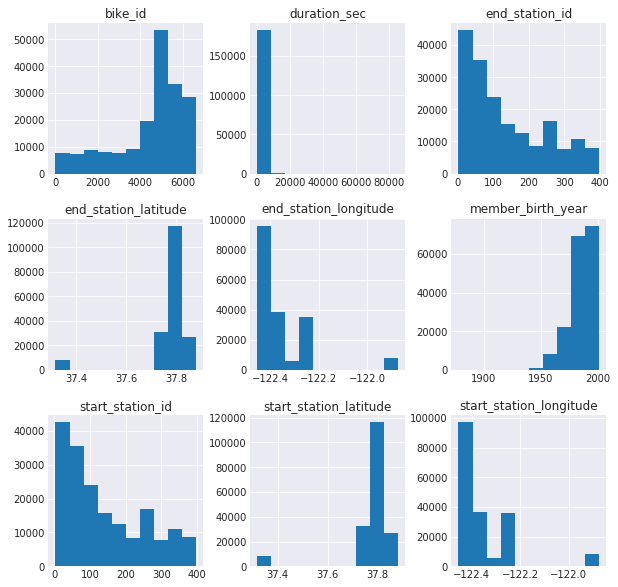

In [12]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
gobike_SF.hist(ax = ax);

>The gobike_SF.hist is just to see if theres any trends or distributions we can see. <br>
>I dont expect any trends from bike_id and any station variables. The duration can be explored more with lower bin sizes as well as member birth year.

<a id='assess'></a>
### Data Assessment
>
>Quality<br>
>1. Erroneous datatypes (start_time, end_time, start_station_id, end_station_id)
>2. Missing records 

>Tidiness<br>
>3. Unneccesary columns for this analysis (start_station_latitude, start_station_longitude, end_station_longitude, end_station_longitude, bike_id).<br>
>4. No "Start Day" and "End day" columns to show name of the day the bike was rented and returned.
>5. No "Start Hour" and "End Hour" columns to show the hour the bike was rented and returned.<br>


<a id='clean'></a>
### Data Cleaning

In [13]:
#Making a copy incase of any mess ups 

gobike = gobike_SF.copy()

#### Define:
>Erroneous datatypes: <br>
>Changing start_time, end_time to datetime data type<br>
> Changing start_station_id, end_station_id to string data type

#### Code

In [14]:
#Changing the data types

gobike['start_time'] = pd.to_datetime(gobike['start_time'])
gobike['end_time'] = pd.to_datetime(gobike['end_time'])

gobike['start_station_id'] =gobike.start_station_id.astype(str)
gobike['end_station_id'] =gobike.end_station_id.astype(str)

#### Test

In [15]:
#Checking if the dtypes changed

gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183412 non-null object
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183412 non-null object
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: datetime64[ns](2), float64(5), int64(2), object(7)
memory usag

#### Define:
> Missing records - Deleting rows with missing records in data set

#### Code

In [16]:
#Deleting missing records from df

gobike.dropna(inplace=True)

#### Test

In [17]:
#Checking if theres any nulls/na

gobike.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

#### Define: 
>Unneccesary columns for this analysis, dropping start_station_latitude, start_station_longitude, end_station_longitude, end_station_longitude, bike_id columns.

#### Code

In [18]:
#dropping columns

gobike.drop(['start_station_latitude', 'start_station_longitude', 
             'end_station_latitude', 'end_station_longitude', 'bike_id'], axis=1, inplace=True)

#### Test

In [19]:
#Checking if the column names are still there

list(gobike.columns)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'end_station_id',
 'end_station_name',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip']

#### Define
>No "Start Day" and "End day" columns to show name of the day the bike was rented and returned. <br>
>Creating the start_day and end_day columns as days of the week

#### Code

In [20]:
#Taking start_time and extracting the day into start_day (same for end_time/end_day)

gobike['start_day'] = gobike['start_time'].dt.day_name()

gobike['end_day'] = gobike['end_time'].dt.day_name()


#### Test

In [21]:
list(gobike.columns)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'end_station_id',
 'end_station_name',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip',
 'start_day',
 'end_day']

#### Define:
>Adding start_hour and end_hour columns to show the hour the bike was rented and returned.

#### Code

In [22]:
#Adding start_hour and end_hour

gobike['start_hour'] = gobike.start_time.dt.hour

gobike['end_hour'] = gobike.end_time.dt.hour

#### Test

In [23]:
list(gobike.columns)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'end_station_id',
 'end_station_name',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip',
 'start_day',
 'end_day',
 'start_hour',
 'end_hour']

In [24]:
gobike.shape

(174952, 15)

### What is the structure of your dataset?

> After removing unneccessary columns as well as adding columns and removing missing values. The dataset has 174 952 rows and 15 columns.

### What is/are the main feature(s) of interest in your dataset?

> Duration of customer types and genders

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Analysis of the variables mentioned in the above question.

<a id='uni'></a>
## Univariate Exploration
> single-variable plots

#### 1. Distribution of duration variable

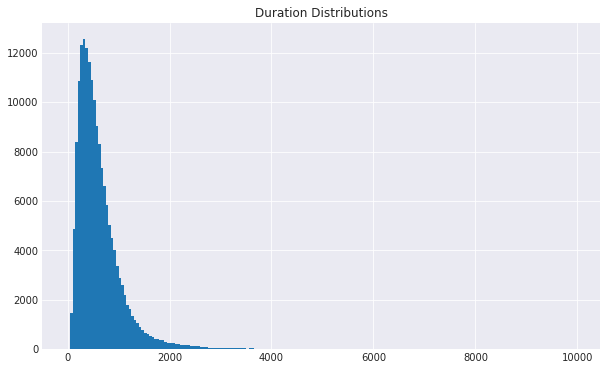

In [25]:
#Histogram for duration - Looking for any trends in the data

plt.figure(figsize=(10,6))
bins = np.arange(0, 10000, 50)

plt.hist(gobike.duration_sec, bins=bins)
plt.title('Duration Distributions');

>Duration in seconds seem right skewed but can be done better...

In [26]:
#Adding a duration_minutes column to see if we can get a better graph from that

gobike['duration_min'] = gobike['duration_sec']/60


(0, 110000)

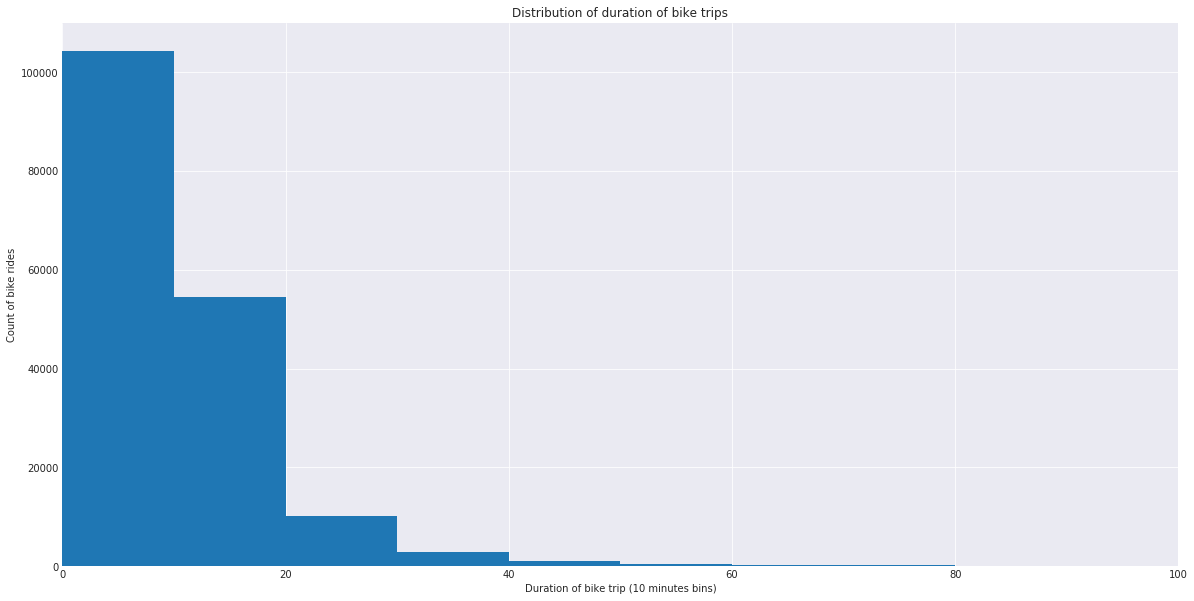

In [27]:
#Plotting histogram for first 100min in 10min intervals

bins = np.arange(0, gobike.duration_min.max(0)+1, 10)
plt.figure(figsize=(20,10))
plt.hist(data=gobike, x='duration_min', bins=bins)
plt.title('Distribution of duration of bike trips')
plt.ylabel('Count of bike rides')
plt.xlabel('Duration of bike trip (10 minutes bins)')
plt.xlim((0,100))
plt.ylim((0,110000))

>Looking at the duration from 0 to 100min in intervals of 10min. We can see that most rides are within the first 10min

(0, 260)

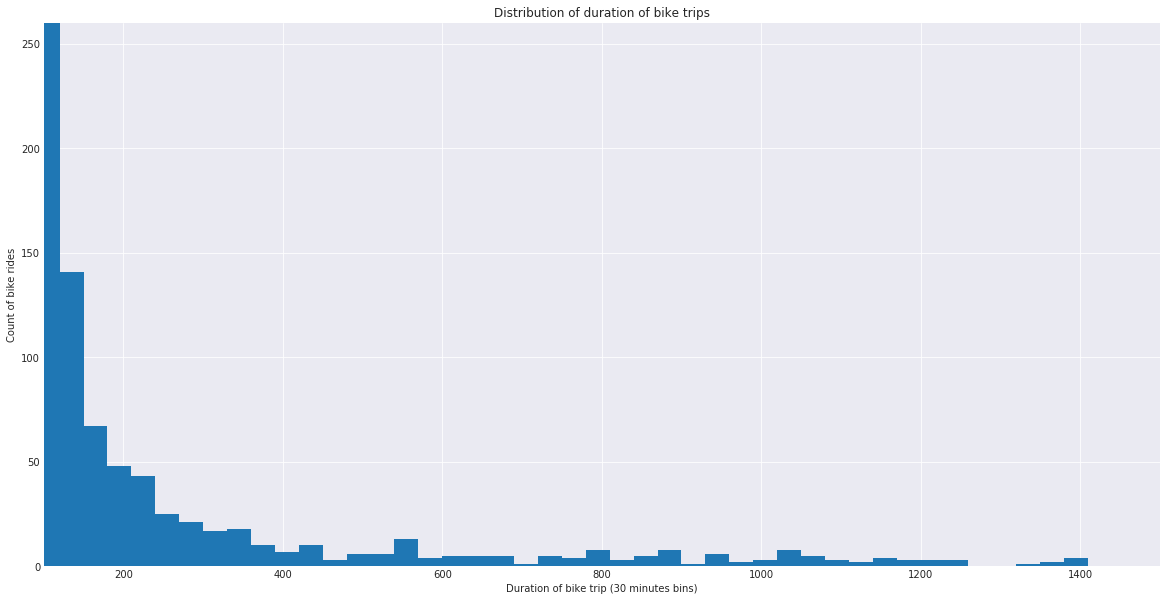

In [28]:
#Plotting histogram that shows ride durations after 200min in 30min intervals

bins = np.arange(0, gobike.duration_min.max(0)+1, 30)
plt.figure(figsize=(20,10))
plt.hist(data=gobike, x='duration_min', bins=bins)
plt.title('Distribution of duration of bike trips')
plt.ylabel('Count of bike rides')
plt.xlabel('Duration of bike trip (30 minutes bins)')
plt.xlim((100,1500))
plt.ylim((0,260))

>Looking at the duration thats from 100 until the end (1500) in 30min bins, we can see theres alot of data distributed here.

#### 2. Percentage of male and female users

In [29]:
#creating my count variables 

male = gobike.query("member_gender == 'Male'")["member_gender"].count()
female = gobike.query("member_gender == 'Female'")["member_gender"].count()

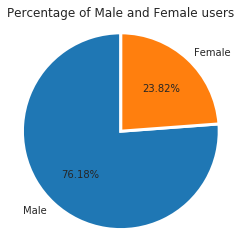

In [30]:
#pie chart for member_gender

labels = 'Male', 'Female'
sizes = [male, female]
plt.pie(sizes, labels=labels, autopct='%.2f%%', startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.title("Percentage of Male and Female users")
plt.axis('square');


>Over 3/4 of the users are Male at 76.18%

#### 3. Percentage of User types

In [31]:
#creating my count variables 

customer = gobike.query("user_type == 'Customer'")["user_type"].count()
subscriber = gobike.query("user_type == 'Subscriber'")["user_type"].count()

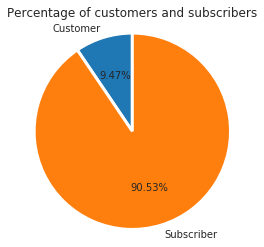

In [32]:
#pie chart for user_types

labels = 'Customer', 'Subscriber'
sizes = [customer, subscriber]
plt.pie(sizes, labels=labels, autopct='%.2f%%', startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.title("Percentage of customers and subscribers")
plt.axis('square');

>90% of Ford Gobike are subscribers with only 9.47% being customers.

#### 4.The number of bike rides rented on the various days of the week 

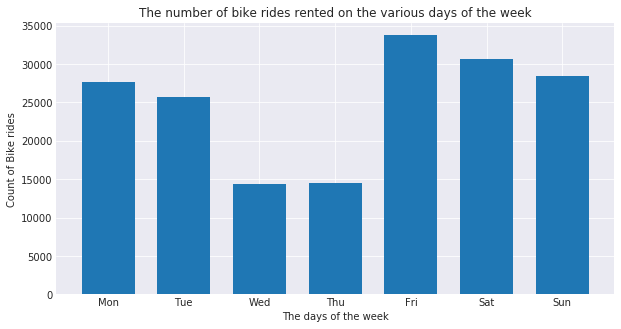

In [33]:
#Bar graph showing start_day 

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


plt.figure(figsize=[10,5])
bin_edges = np.arange(-0.5, 6.5+1, 1)
plt.hist(data = gobike, x = 'start_day', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(0, 6+1, 1), days)
plt.title('The number of bike rides rented on the various days of the week')
plt.xlabel('The days of the week')
plt.ylabel('Count of Bike rides');

>Whats interesting to see is that friday and the weekend is the days with the most bike rentals. This could be that people are going out after work or the weekend to explore or just use it as a mode of transport.

#### 5. Hours in which the bikes were rented the most

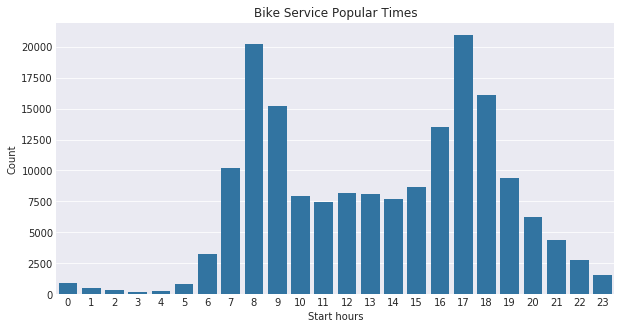

In [34]:
#Bar graph showing start_hour 

base_color = sb.color_palette()[0]
hour_order = np.arange(0,24)

plt.figure(figsize=(10,5))
plt.title('Bike Service Popular Times')
ax = sb.countplot(data=gobike, x='start_hour', order=hour_order, color = base_color)

plt.ylabel('Count')
plt.xlabel('Start hours');

> The highest times are 8am to 5pm, this could suggest people use it as a mode of transportation

#### 6. The hours the bike was returned 

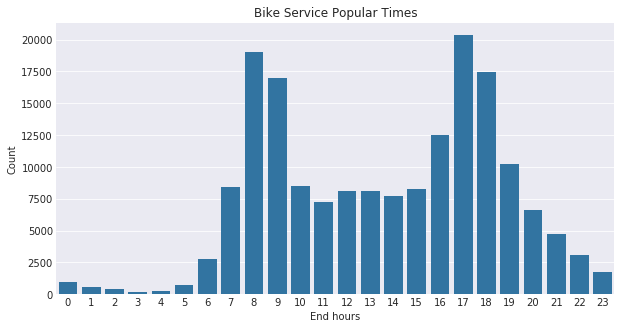

In [35]:
#Bar graph showing end_hour 

base_color = sb.color_palette()[0]
hour_order = np.arange(0,24)

plt.figure(figsize=(10,5))
plt.title('Bike Service Popular Times')
ax = sb.countplot(data=gobike, x='end_hour', order=hour_order, color = base_color)

plt.ylabel('Count')
plt.xlabel('End hours');

> Since this times are also 8 to 5, they could hire the bike and return it in the same hour. This seems more likely

#### 7. The top 10 starting stations

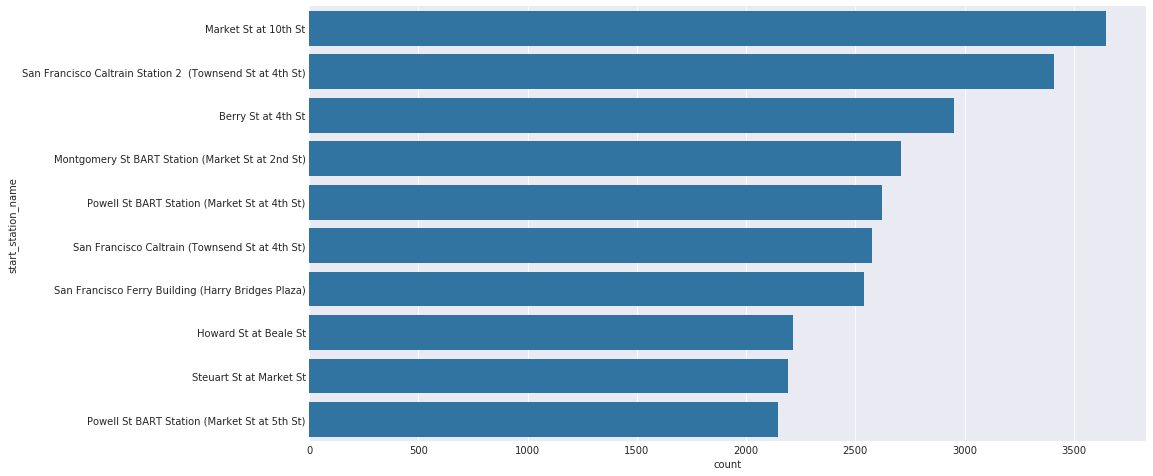

In [36]:
#Plotting top 10 start stations

station_order = gobike['start_station_name'].value_counts().index[:10]

plt.figure(figsize=[15,8])
sb.countplot(data = gobike, y = 'start_station_name', color = base_color, order = station_order);

#### 8. The top 10 starting stations

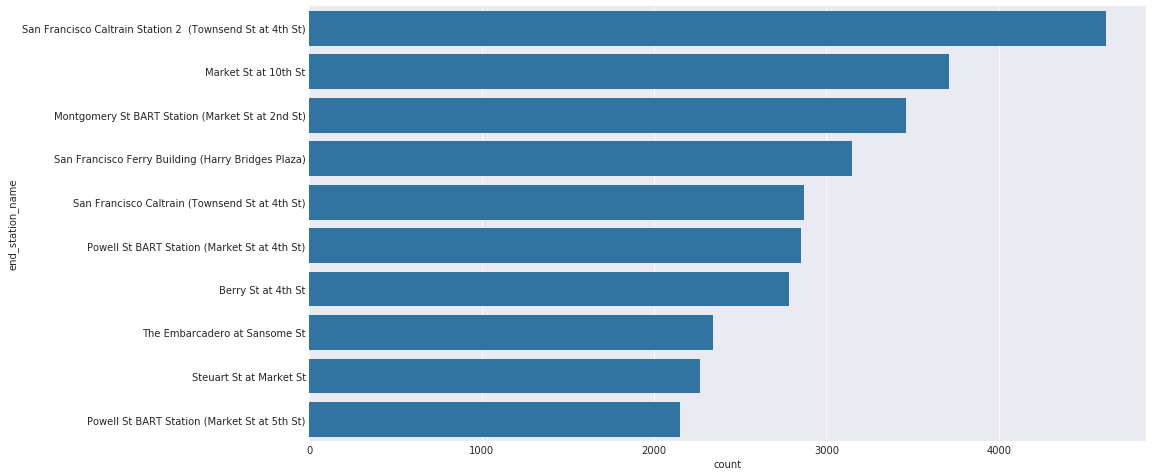

In [37]:
#Plotting top 10 end stations

end_order = gobike['end_station_name'].value_counts().index[:10]

plt.figure(figsize=[15,8])
sb.countplot(data = gobike, y = 'end_station_name', color = base_color, order = end_order);

>The interesting fact about these 2 graphs. The first 2 most used stations (San Francisco Caltrain Station 2 and Market St) are swapped. This could suggest people frequently travel between the two stations

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>  No transformations were performed but the duration seconds was changed into duration minutes for many plots as its an easier read than figuring out how long 1000 seconds is. Most bike end and start hours are around 8am and 5pm. Mostly males use the bikes and 90% of users are subscribers. The busiest days are friday, saturday and sunday.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I've 

<a id='bi'></a>
## Bivariate Exploration

> relationships between pairs of variables

#### 9. What is the relationship between gender and user types?

In [38]:
#I had an issues with the graph where there was "other" in gender, i doubled checked with groupby

genders_count = gobike.groupby(['member_gender'])['member_gender'].count()
print(genders_count)


member_gender
Female     40805
Male      130500
Other       3647
Name: member_gender, dtype: int64


In [39]:
#remove 'other' gender

gobike = gobike.loc[gobike["member_gender"] != 'Other']

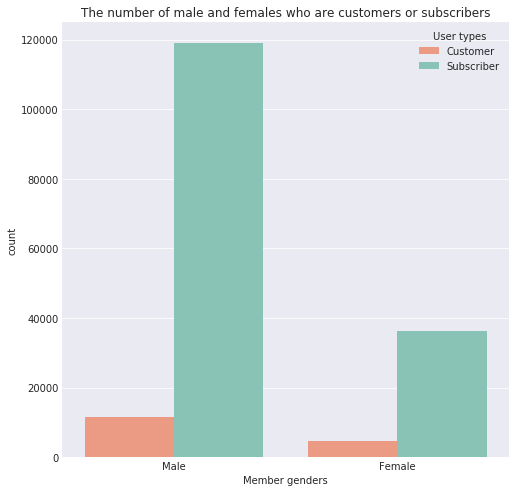

In [40]:
#plotting member_gender and user_type

plt.figure(figsize=(8,8))
ax = sb.countplot(x=gobike.member_gender, hue=gobike.user_type, palette=["#fc9272", "#7fcdbb"])
ax.set_title("The number of male and females who are customers or subscribers")
x_ticks_labels=['Male', 'Female']
ax.set_xticklabels(x_ticks_labels)
ax.set_xlabel('Member genders')

plt.legend(title='User types', loc='upper right', labels=['Customer', 'Subscriber'])
plt.show()

>The number of subscribers are much higher than customers but the number of male subscribers are signficantly larger than females. Males are also higher as customers than females.

#### 10. What is the relationship between gender and user types?

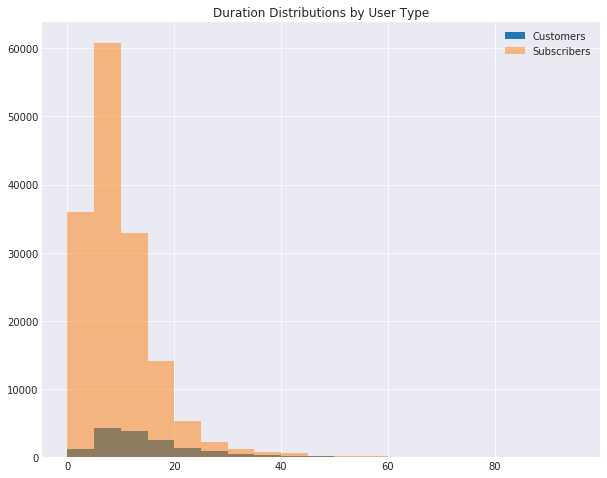

In [41]:
#showing customers and subscribers duration distributions in one graph

customer = gobike['user_type']=='Customer'
subscriber = gobike['user_type']=='Subscriber'

plt.figure(figsize=(10,8))
bins = np.arange(0, 100, 5)

plt.hist(gobike[customer].duration_min, bins, alpha=1, label='Customers')
plt.hist(gobike[subscriber].duration_min, bins, alpha=0.5, label='Subscribers')
plt.legend(loc='upper right')
plt.title('Duration Distributions by User Type')

plt.show()

>Overlapping histogram showing the duration of subscribers and customer users. Customers are much lower in the the duration distribution, this could be due to the higher fees per minute. Majority of subscribers spent 0 to 20min with the bike.

#### 11. What is the relationship between user types and weekdays?

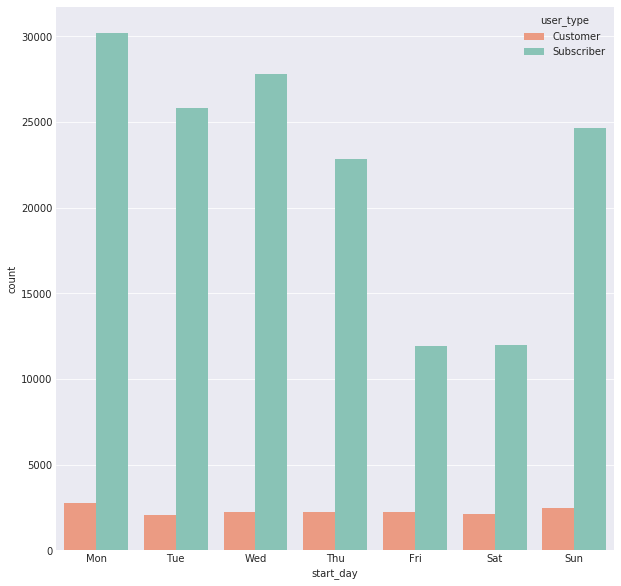

In [43]:
#plotting start_day vs. user_type

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize = [10, 10])
sb.countplot(data = gobike, x = 'start_day', hue = 'user_type', palette=["#fc9272", "#7fcdbb"])
ax.legend(ncol = 2)
plt.xticks(np.arange(0, 6+1, 1), days)
plt.show()

>Comparing the days of the week to when customers and subscribers use the bike service the most. Interestingly, Monday, Tuesday and Wednesday is the highest for subscribers while Monday and Sunday are high for customers. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is a huge difference between subscribers and customers so its difficult to compare them side by side without looking at proportions. The males tend to be the most users in both user types. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The univariate plot of count of bike rides during the week compared to when I add another variable of user types, is different. 

<a id='multi'></a>
## Multivariate Exploration

> three or more variables to investigate the data

#### 12. average trip duration of different users of males and females

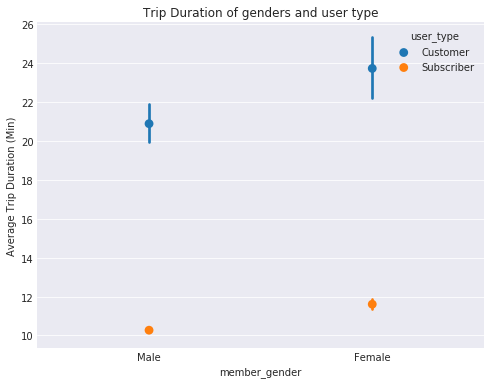

In [46]:
#pointplot for users and genders with average trip duration

fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = gobike, x ='member_gender', y = 'duration_min', hue = 'user_type', linestyles = '')
plt.title('Trip Duration of genders and user type')
plt.ylabel('Average Trip Duration (Min)')
plt.show();

> Female users tend to use the bikes for longer than males. They also have a higher variation amongst the averages.

#### 13. average trip duration of different users during the days of the week

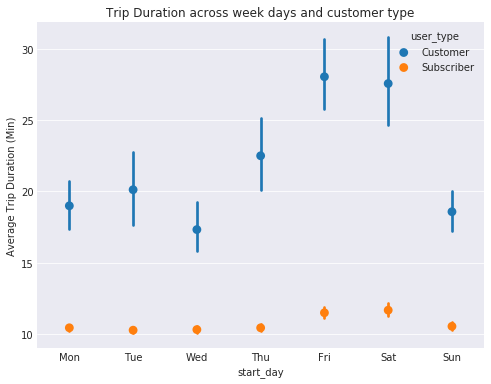

In [47]:
#pointplot for users and days with average trip duration

fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = gobike, x ='start_day', y = 'duration_min', hue = 'user_type', linestyles = '')
plt.title('Trip Duration across week days and customer type')
plt.ylabel('Average Trip Duration (Min)')
plt.xticks(np.arange(0, 6+1, 1), days)
ax.set_yticklabels([],minor = True)
plt.show();

>Friday and Saturday are the highest from both user types. Thursday being the 3rd highest from customers while Sunday being the 3rd highest for subscribers

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Females have a higher average ride duration with customers have the higher average ride duration compared to subscribers.

### Were there any interesting or surprising interactions between features?

> Yes! Customers seem to have a longer average ride duration than subscribers. 

## Conclusions
>Each of these graphs reinforces the general hypothesis that customers are more like recreational users or touritsts or one time users while subcribers tend to be people that use them to go to work or school.<br>
>Since subscribers have a much higher user base, it skewed the most frequent hours to 8am and 5pm. If an analysis was done on the hours customers have used them, it'd be interesting to see the differnce.<br>
> The bike trip duration of Customers is significantly higher than Subscribers.<br>
>About 90% of the trips were taken by subscribers.<br>
>About 3/4 of the users are male.



In [ ]:
#Saving Datase

Thank you.